## Simple learning regression minimal example

## 1) Import the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## 2) Generate random input data to train on

In [23]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs  = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


## 3) Create Target we will aim at

## here suppose the target is targets = f(x,y) = 2*x-3*z+5+noise

## w1 = 2 w2 =3 b =5

In [24]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs +5 + noise
print(targets.shape)

(1000, 1)


## Plot the training data

# the point is to see that there is a strong trend that our model should learn to reproduce

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1000,)  and requested shape (1000,1)

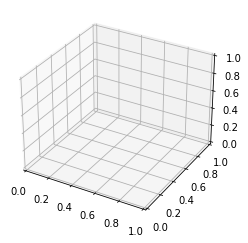

In [25]:
targets = targets.reshape(observations,)

fig  = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)


## y = b + x*w         w and b vary

## initialize variable

init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1))

biases = np.random.uniform(-init_range,init_range,size=1)
print(weights)
print(biases)

In [41]:
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1))

biases = np.random.uniform(-init_range,init_range,size=1) 
print(weights)
print(biases)


[[ 0.07717531]
 [-0.07639571]]
[-0.00938751]


## Set a learning rate (eta)

In [42]:
learning_rate = 0.2


## training the model

In [43]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas * deltas)/2/observations
    
    print(loss)
    
    deltas_scaled = deltas/observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    
    biases = biases - learning_rate * np.sum(deltas_scaled)
    

227699.64789432407
363796573.3809609
14399361507576.365
5.703129185768522e+17
2.2588282483196855e+22
8.946500928535358e+26
3.5434247346529037e+31
1.4034379418776313e+36
5.558571732707225e+40
2.201573634692694e+45
8.719733597129262e+49
3.453609400419524e+54
1.367864941951081e+59
5.417678383639876e+63
2.145770256140423e+68
8.498714146710785e+72
3.3660706192012455e+77
1.333193612334283e+82
5.280356264155584e+86
2.0913813281469574e+91
8.28329688550132e+95
3.28075068711403e+100
1.299401098352371e+105
5.146514854149478e+109
2.0383709985751128e+114
8.073339814577805e+118
3.1975933628966114e+123
1.2664651246288633e+128
5.016065927933516e+132
1.9867043240333136e+137
7.868704534269789e+141
3.116543830837289e+146
1.234363980402185e+151
4.888923496079892e+155
1.9363472468415943e+160
7.669256152929072e+164
3.037548664640529e+169
1.203076505214337e+174
4.765003748738393e+178
1.8872665725814148e+183
7.474863198011636e+187
2.9605557922092837e+192
1.1725820749623171e+197
4.64422500039052e+201
1.8394299

<ipython-input-43-122a83bf3797>:4: RuntimeWarning: overflow encountered in multiply
  loss = np.sum(deltas * deltas)/2/observations


In [45]:
print(weights,biases)

[[-9.30626255e+225 -9.30626255e+225 -9.30626255e+225 ... -9.30626255e+225
  -9.30626255e+225 -9.30626255e+225]
 [-9.06828292e+226 -9.06828292e+226 -9.06828292e+226 ... -9.06828292e+226
  -9.06828292e+226 -9.06828292e+226]] [-3.31424298e+230]


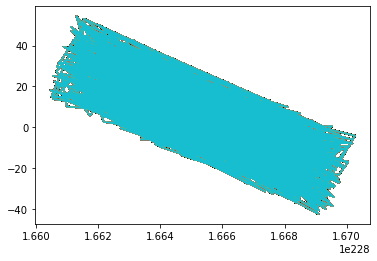

In [44]:
plt.plot(outputs,targets)
plt.show()